# CMS Leptonic Decay Analysis

This activity uses data from the CMS detector at CERN's LHC. It's actually the same activity we've used at Data Camp for several years, but using Python to pick it apart instead of a spreadsheet. The files contain collision events. You'll begin by looking at the events which included two muons in the decay products.

Go to the menu bar above and select **Kernel > Restart & Run All**. Then, scroll down to **Part One**.

*Note: You won't hurt anything by experimenting. If you break it, go to **File > Revert to checkpoint** to start over.*

In [1]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
inline_rc = dict(mpl.rcParams)

In [2]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does
# Blank lines don't do anything either, but they can make the code easier to read

two_u = pd.read_csv('./Double_Muon_Run2011A.csv')
# two_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Double_Electron_Run2011A.csv')
# one_u = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Single_Muon_Run2011A.csv')
# one_e = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/Single_Electron_Run2011A.csv')

In [3]:
# The .head(n) command displays the first n rows of a file.
two_u.head(3)

,﻿Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,74601703,G,9.69873,-9.51043,0.366205,1.86329,9.51748,0.194546,3.10311,-1,G,9.76332,7.32771,-1.152370,6.34728,7.41776,0.775564,-0.155984,1
1,165617,75100943,G,6.20385,-4.26661,0.456545,-4.47930,4.29097,-0.912070,3.03499,-1,G,9.66898,7.27397,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1
2,165617,75587682,G,19.28920,-4.21208,-0.651623,18.81210,4.26219,2.190460,-2.98811,-1,G,9.82439,4.34394,-0.473505,8.79849,4.36967,1.449670,-0.108575,1


In [4]:
# The .shape command displays the (number of rows , number of columns) in a file.
two_u.shape

(475465, 20)

## Part One
Let's get acquainted with this dimuon data set. Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent?
- How many events does this data set contain?

In [5]:
# You can specify a column by dataset.columnName (e.g., two_u.E1)
# This makes a new column called "totalE" and fills it with (E1 + E2) for each event
two_u['totalE'] = two_u.E1 + two_u.E2

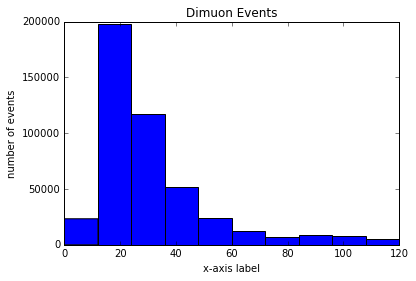

In [6]:
# makes the histogram
plt.hist(two_u.totalE, bins=10, range=[0,120], log=False)
plt.title("Dimuon Events")
plt.xlabel("x-axis label")
plt.ylabel("number of events")

## Part Two
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram above.
- What do you think the histogram above is showing? Try looking in the cell just before the graph to see the code that made it.
- The x-axis label looks like it could use some work. Try typing a better label in the code before the graph. Then, "execute" the cell by pressing shift+enter or clicking the "play" icon in the toolbar.
- It's also customary to plot this type of data on a log scale. Try that out.
- The Z boson has a mass of around 90 GeV and can decay into two muons. Does your data incidate Z production? Tinkering with the histogram's range and number of bins might help your search.

## Part Three
Try one of the following
- Create a histogram to show the production of one of the [J/$\Psi$](https://en.wikipedia.org/wiki/J/psi_meson) or [Upsilon](https://en.wikipedia.org/wiki/Upsilon_meson) ($\Upsilon$).
- (more coding) Look at a different decay channel. The second code cell in this activity (probably labeled "ln[2]") gives you some options.
- (more math) If we're particle hunting, the previous plot really isn't the one we need. The mass of a particle isn't just equal to the toal energy of its decay products. If you recall what a relativistic 4-vector is, that could help replot your mass reconstruction more accurately.

## Bonus
The cells below show some sillier or more advanced tehniques.

In [7]:
# run this command to make your plots look like they're from xkcd.com
plt.xkcd()
# then re-execute your code to make a plot and see it xkcd-ified.

In [8]:
# run this cell to make normal-looking plots again
mpl.rcParams.update(inline_rc)

In [9]:
# calculates descriptive statistics
two_u.describe()

,﻿Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE
count,475465.000000,4.754650e+05,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000,475465.000000
mean,167785.943119,4.788622e+08,21.902022,-0.107231,-0.713106,-1.040151,10.942925,-0.094117,-0.112941,0.035100,15.896824,0.069391,0.675708,0.800491,10.901173,0.078403,0.112177,-0.035100,37.798845
std,3698.877156,5.593981e+08,29.624106,11.627325,12.127312,32.762900,10.846589,1.299287,1.821436,0.999385,18.554144,10.839557,10.951980,18.931736,15.769593,0.952914,1.804345,0.999385,42.567515
min,160957.000000,9.000000e+01,2.705040,-2872.290000,-3846.230000,-7237.650000,0.086912,-2.399940,-3.141590,-1.000000,2.576120,-250.267000,-1339.220000,-612.048000,0.133530,-2.399860,-3.141550,-1.000000,5.951600
25%,165617.000000,1.125653e+08,9.098770,-4.789810,-5.115530,-11.209200,5.280940,-1.255120,-1.694370,-1.000000,6.950840,-4.642460,-4.224930,-4.953800,5.202850,-0.610616,-1.428470,-1.000000,17.568030
50%,166701.000000,2.579929e+08,13.723900,-0.110537,-0.736226,-1.589870,7.391320,-0.177596,-0.216865,1.000000,10.053400,0.072385,0.662365,0.647675,7.321510,0.085832,0.203961,-1.000000,25.266530
75%,172791.000000,6.068714e+08,22.591000,4.677240,4.227450,9.587310,11.611000,1.110350,1.456980,1.000000,17.065000,4.704260,5.070920,6.379760,11.600600,0.764926,1.672350,1.000000,39.372700
max,173692.000000,3.056722e+09,8684.880000,505.579000,265.895000,843.854000,969.958000,2.399960,3.141560,1.000000,1604.970000,528.899000,326.782000,709.011000,7921.690000,2.399900,3.141550,1.000000,8708.483800


In [10]:
# Making cuts on your data (i.e., filtering your data set)
eta_cut = two_u.query('eta1 > 2 & eta2 > 2')
eta_cut.head()

,﻿Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE
19,165617,74751994,G,44.22470,8.09262,7.920330,42.75040,11.32350,2.03874,0.774639,...,G,17.19590,-2.855870,-3.237140,16.64490,4.31683,2.05913,-2.293700,1,61.42060
78,165617,75833588,G,181.87700,44.14270,-14.949800,175.80400,46.60550,2.03792,-0.326545,...,G,170.02100,-34.630100,12.324800,166.00000,36.75790,2.21282,2.799670,-1,351.89800
133,165617,75682819,G,22.60670,5.02668,-0.315528,22.03830,5.03658,2.18201,-0.062688,...,G,17.87970,2.798720,2.056710,17.53880,3.47317,2.32216,0.633751,-1,40.48640
502,165617,80486266,G,18.52970,2.22363,-2.808580,18.17980,3.58227,2.32703,-0.901120,...,T,5.33630,0.583167,-0.938683,5.21955,1.10508,2.25666,-1.014890,-1,23.86600
590,165617,79051358,G,6.63246,-0.24928,1.342030,6.48962,1.36499,2.26309,1.754450,...,T,4.93516,0.713877,0.714097,4.82961,1.00973,2.26898,0.785552,-1,11.56762


In [11]:
# here's another example
type_cut = two_u.query('Type1 == "G" & Type2 == "G"')
type_cut.head()

,﻿Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,totalE
0,165617,74601703,G,9.69873,-9.510430,0.366205,1.86329,9.51748,0.194546,3.10311,...,G,9.76332,7.327710,-1.152370,6.34728,7.41776,0.775564,-0.155984,1,19.46205
1,165617,75100943,G,6.20385,-4.266610,0.456545,-4.47930,4.29097,-0.912070,3.03499,...,G,9.66898,7.273970,-2.821120,-5.71040,7.80188,-0.678625,-0.369977,1,15.87283
2,165617,75587682,G,19.28920,-4.212080,-0.651623,18.81210,4.26219,2.190460,-2.98811,...,G,9.82439,4.343940,-0.473505,8.79849,4.36967,1.449670,-0.108575,1,29.11359
3,165617,75660978,G,7.04268,-6.326780,-0.268545,3.08025,6.33248,0.469033,-3.09917,...,G,5.58571,4.474760,0.848935,-3.23185,4.55458,-0.660499,0.187488,1,12.62839
4,165617,75947690,G,7.27507,0.102966,-5.533080,-4.72122,5.53403,-0.773616,-1.55219,...,G,7.31811,-0.398831,6.940810,2.28247,6.95226,0.322677,1.628190,1,14.59318


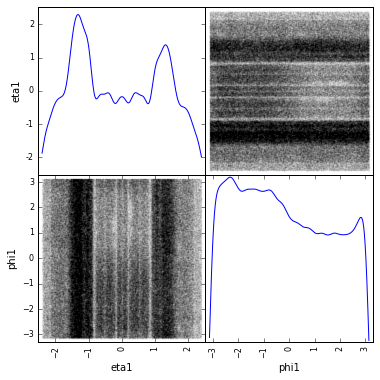

In [12]:
# Creates a matrix of pair plots. FYI: this takes a long time for 3+ columns
newdata = two_u[['eta1','phi1']]
pd.scatter_matrix(newdata, s=.001, figsize=(6, 6), diagonal='kde');

## Saving Your Work
You have a few options:
- File > Download as > ipynb (to continue your analysis later)
- File > Download as > pdf (static copy including code and graphs)
- Right-click on a graph and select Save Image As ... (to share a pic)